In [1]:
import csv
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
import matplotlib.pyplot as plt
%matplotlib inline
# from sklearn.metrics import roc_curve, auc

In [2]:
# Import master matrix for testing and examine 

master = pd.read_csv('C:/Users/ajarczyk/Dropbox/Programming/BI_Project/Master matrix.csv')
master.head()

,Date,Number,Decreased,Same,Increased
0,2/3/2009,1,1,0,0
1,3/20/2009,2,1,0,0
2,4/20/2009,3,1,0,0
3,5/13/2009,4,1,0,0
4,6/9/2009,5,1,0,0


In [4]:
# Examine breakdown for the total sample 

master[['Decreased', 'Same', 'Increased']].sum()

Decreased    10
Same         67
Increased     5
dtype: int64

In [6]:
# Open training files for each training group and combine into single text files
# Feed python the appropriate character set for decoding 

text = []
for i in master.Number:
    fname = 'C:/Users/ajarczyk/Dropbox/Programming/BI_Project/BIEngStatement' + str(i) + '.txt'
    temp = open(fname).read().decode('utf_16')
    text.append(temp)
master['text'] = text

In [28]:
# Separate the individual words in the documents

vectorizer = CountVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(master.text)
y = (master.Same == 1).values.astype(np.int)

In [29]:
# Use SKLearn's train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=36)

In [30]:
# Adapted from Misrab's example

def accuracy_report(_clf):
    #Print the accuracy on the test and training dataset
    training_accuracy = _clf.score(xtrain, ytrain)
    test_accuracy = _clf.score(xtest, ytest)

    print "Accuracy on training data: %0.2f%%" % (100 * training_accuracy)
    print "Accuracy: %0.2f%%" % (100 * test_accuracy)

In [31]:
# Adjust to see how prior works on test set 

atb = float(master['Same'].sum()) / len(master) * 100
print "Accuracy to beat: %0.2f" % atb + "%"

Accuracy to beat: 81.71%


In [60]:
# Run Multinomial NB and report accuracy
clf = MultinomialNB()
clf.fit(xtrain, ytrain)
accuracy_report(clf)

Accuracy on training data: 93.85%
Accuracy: 82.35%


In [62]:
# Aggregate stats for ROC curve chart
# Some code sourced from: http://blog.yhat.com/posts/roc-curves.html 
# Some code also sourced from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

preds = clf.predict_proba(xtest)[:,1]
fpr, tpr, _ = metrics.roc_curve(ytest, preds)
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

In [34]:
# Run Bernoulli NB for comparison

clf = BernoulliNB().fit(xtrain, ytrain)
accuracy_report(clf)

Accuracy on training data: 86.15%
Accuracy: 76.47%


In [35]:
# Aggregate stats for ROC curve chart

preds = clf.predict_proba(xtest)[:,1]
fpr2, tpr2, _ = metrics.roc_curve(ytest, preds)
df2 = pd.DataFrame(dict(fpr2=fpr2, tpr2=tpr2))

In [45]:
# Run Logistic Regression for comparison

clf = LogisticRegression()
clf.fit(xtrain, ytrain)
accuracy_report(clf)

Accuracy on training data: 100.00%
Accuracy: 82.35%


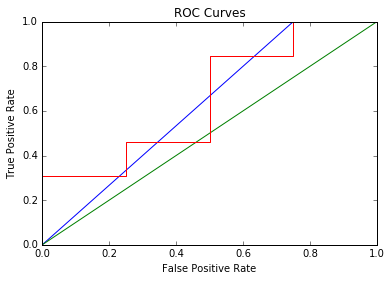

In [58]:
# Plot ROC curves for the various models

plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.plot(df["fpr"], df["tpr"])
plt.plot(df2["fpr2"], df2["tpr2"])
plt.plot(df3["fpr3"], df3["tpr3"])

In [10]:
#classifier = OneVsRestClassifier(MultinomialNB())
#preds = classifier.fit(xtrain, ytrain).predict_proba(xtest)[:, 0]
#preds

In [11]:
#ytest - preds

In [12]:
# Code from http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html 

#n_classes = ytest.shape[0]
#preds = clf.predict_proba(xtest)

#fpr = dict()
#tpr = dict()
#for i in range(n_classes):
#    fpr[i], tpr[i], _ = roc_curve(ytest[:, i], preds[:, i])

In [ ]:
# Original format for Multinoulli, Bernoulli, and Logistic Regression
clf = BernoulliNB().fit(xtrain, ytrain)
accuracy_report(clf)